In [1]:
from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt
import scipy as sp
import scipy.sparse.linalg as sla
import skimage

In [2]:
#Load images
def build_dataset():
    dataset = []
    
    for i in range(1, 16):
        filelist = glob.glob('./yale_face_database/subject'+str(i).zfill(2)+"*")
        for fname in filelist:
            #img = np.array(Image.open(fname)))
            img = np.array(skimage.data.imread(fname))
            img = img.reshape(img.shape[0]*img.shape[1])
            dataset.append(img)

    dataset = np.array(dataset)
    
    return dataset

In [3]:
# Reduce Data points from mean 
def normalize(dataset):
    mean_vector = np.mean(dataset, axis=0)
    dataset = dataset - mean_vector

    return dataset, mean_vector

In [4]:
# find the SVD of the input data
def findSvd(X,mean_vector,Features):
    print("X:", X.shape, " ", Features)
    u, s, vt = sla.svds(X, k=Features)
    print("u : " , u.shape)
    print("s : " , s.shape)
    print("vt : " , vt.shape)
    s = np.flip(s)
    z = np.dot(X,vt.transpose())
    print("z : ",z.shape)
    Xnew = np.sum([mean_vector,np.dot(z,vt)])
    error = np.sum(np.square(np.subtract(X,Xnew)))
    print(Xnew.shape)
    
    
    return Xnew, error

In [1]:
import tensorflow as tf



In [10]:
y = tf.constant([0,0,0,0,0,0])
x = tf.constant([2,3,4,5,6,7])

In [5]:
# Show the images
def pltimages(X,Xnew):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 30))

    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    
    ax1.set_title('Actual Image')
    ax2.set_title('Reduced Mean Image')
    ax3.set_title('Recreated Image')

    ax1.imshow(plt.imread('./yale_face_database/subject01.leftlight'),cmap='Greys_r')
    ax2.imshow(np.array(X[3].reshape(243,320)),cmap='Greys_r')
    ax3.imshow(np.array(Xnew[3].reshape(243,320)),cmap='Greys_r')

(165, 77760)
(165, 77760)
(77760,)
X: (165, 77760)   60
u :  (165, 60)
s :  (60,)
vt :  (60, 77760)
z :  (165, 60)
(165, 77760)
2800640547.9711504


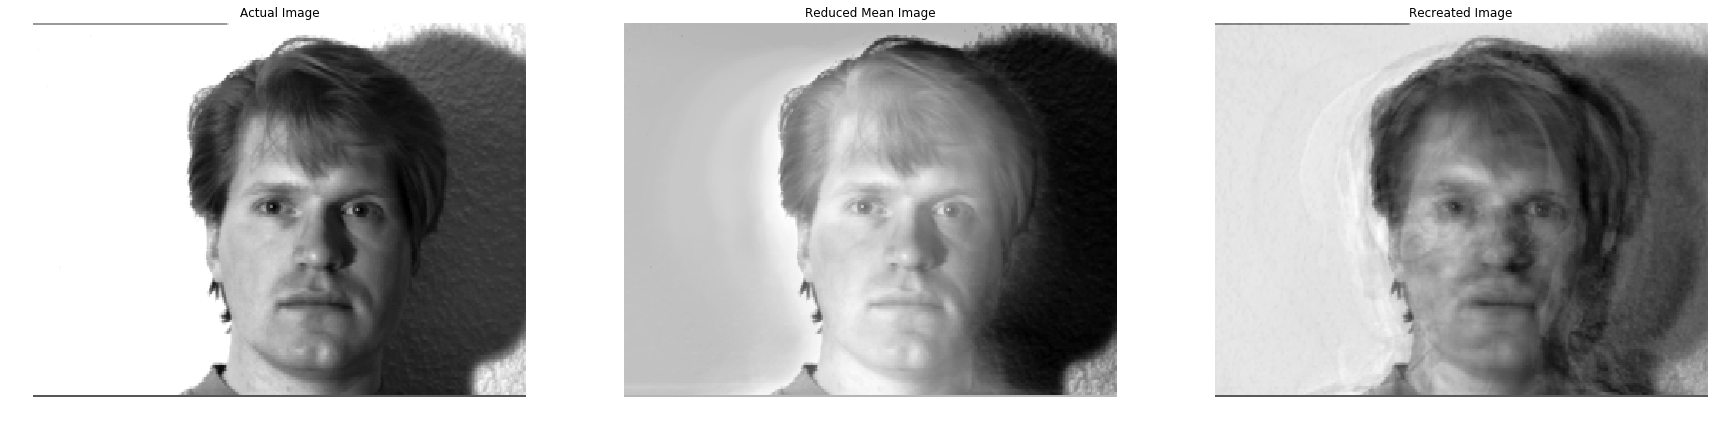

In [6]:
dataset = build_dataset()
num_components = len(dataset)
print(dataset.shape)

X, mean_vector = normalize(dataset)
print(X.shape)
print(mean_vector.shape)


Xnew, error =  findSvd(X,mean_vector,60)
print(error/165)
pltimages(X,Xnew)

X: (165, 77760)   5
u :  (165, 5)
s :  (5,)
vt :  (5, 77760)
z :  (165, 5)
(165, 77760)
2905094888.2546697


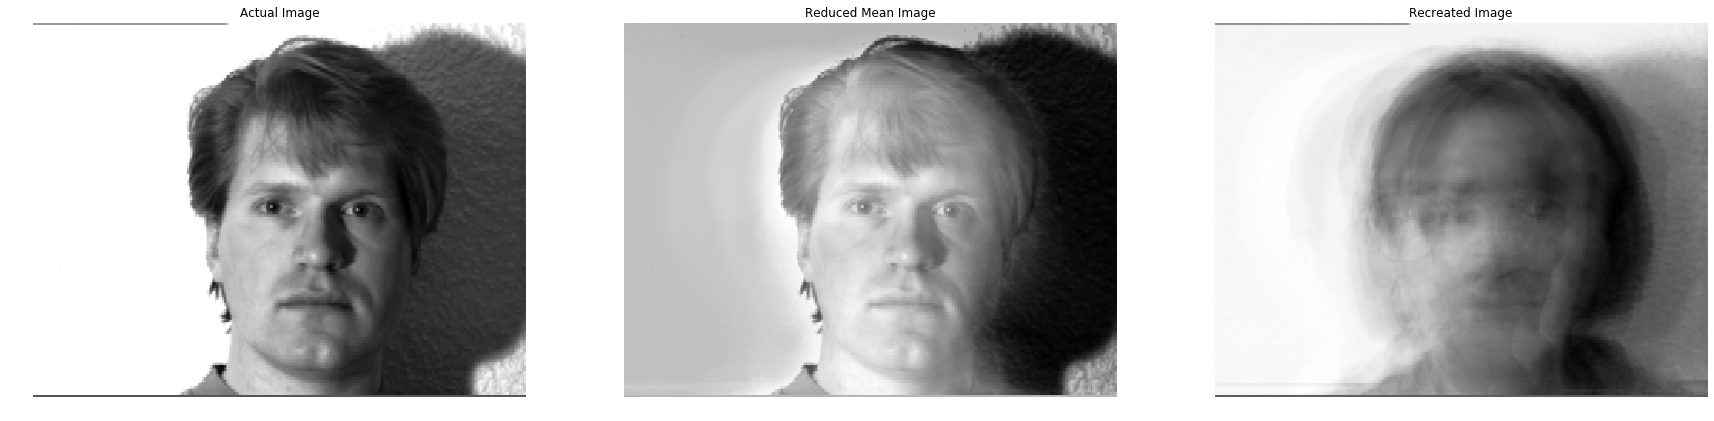

In [7]:
Xnew, error =  findSvd(X,mean_vector,5)
print(error/165)
pltimages(X,Xnew)

X: (165, 77760)   10
u :  (165, 10)
s :  (10,)
vt :  (10, 77760)
z :  (165, 10)
(165, 77760)
2859775069.474375


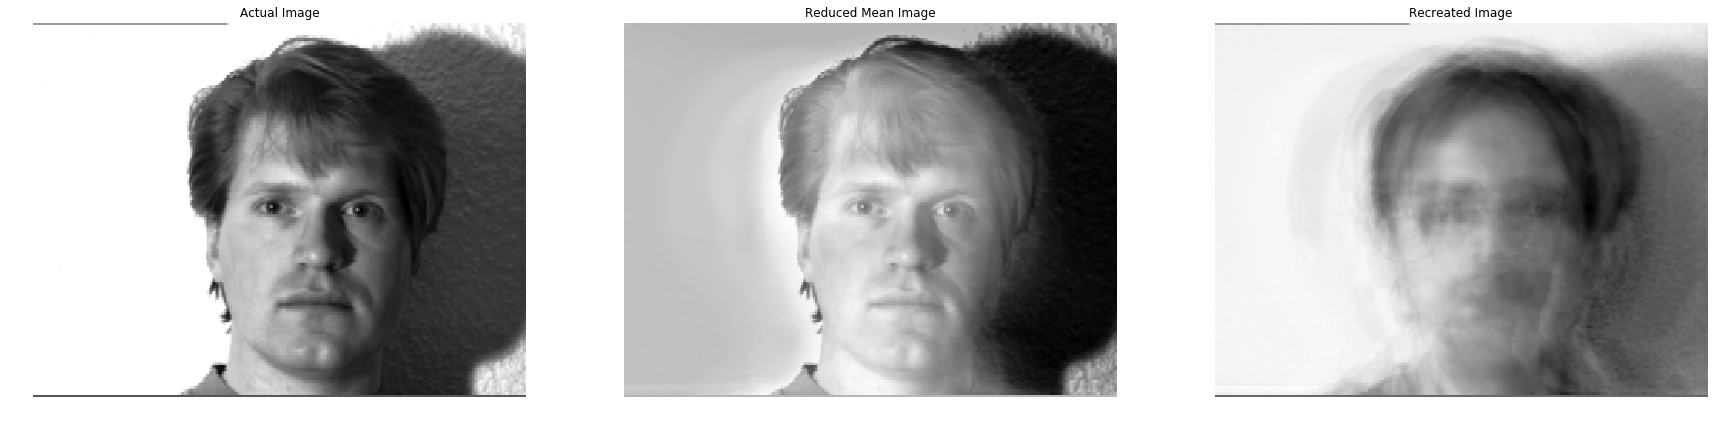

In [8]:
Xnew, error =  findSvd(X,mean_vector,10)
print(error/165)
pltimages(X,Xnew)

X: (165, 77760)   15
u :  (165, 15)
s :  (15,)
vt :  (15, 77760)
z :  (165, 15)
(165, 77760)
2841951960.5469203


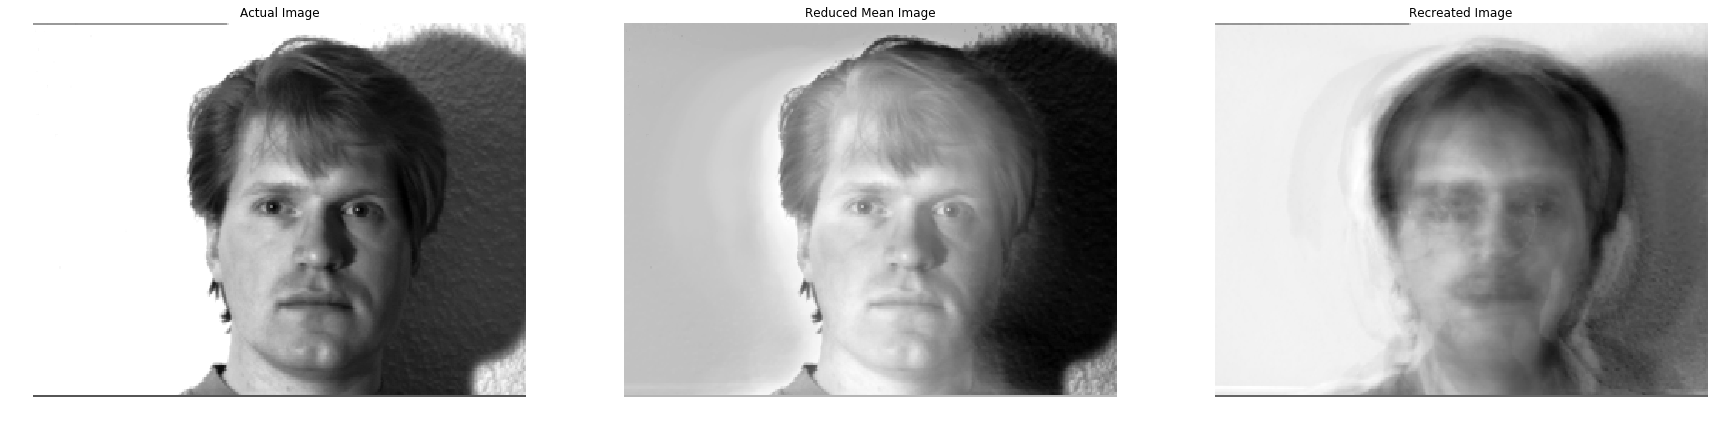

In [9]:
Xnew, error =  findSvd(X,mean_vector,15)
print(error/165)
pltimages(X,Xnew)

X: (165, 77760)   20
u :  (165, 20)
s :  (20,)
vt :  (20, 77760)
z :  (165, 20)
(165, 77760)
2830316562.922646


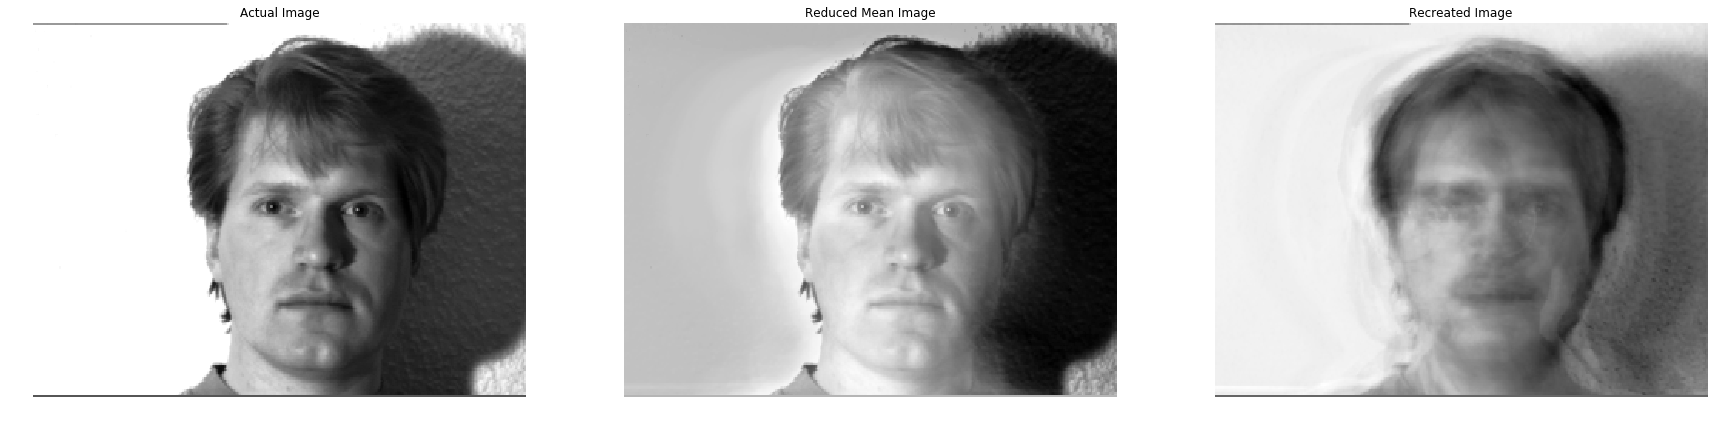

In [10]:
Xnew, error =  findSvd(X,mean_vector,20)
print(error/165)
pltimages(X,Xnew)

X: (165, 77760)   30
u :  (165, 30)
s :  (30,)
vt :  (30, 77760)
z :  (165, 30)
(165, 77760)
2817080517.494344


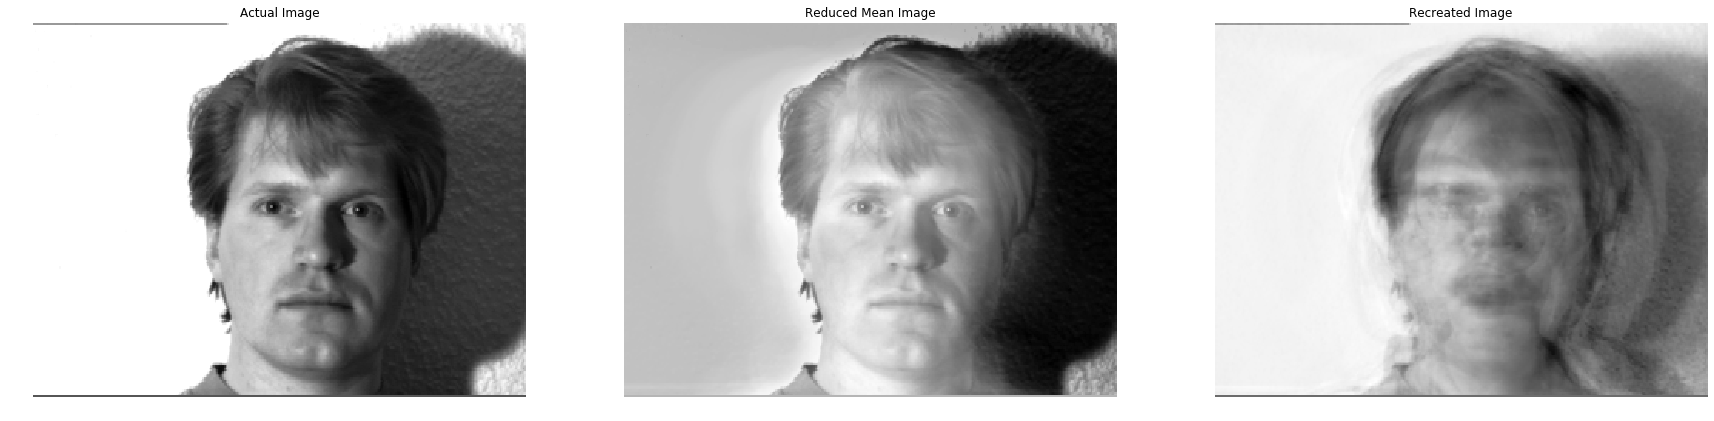

In [11]:
Xnew, error =  findSvd(X,mean_vector,30)
print(error/165)
pltimages(X,Xnew)

X: (165, 77760)   40
u :  (165, 40)
s :  (40,)
vt :  (40, 77760)
z :  (165, 40)
(165, 77760)
2809530713.26458


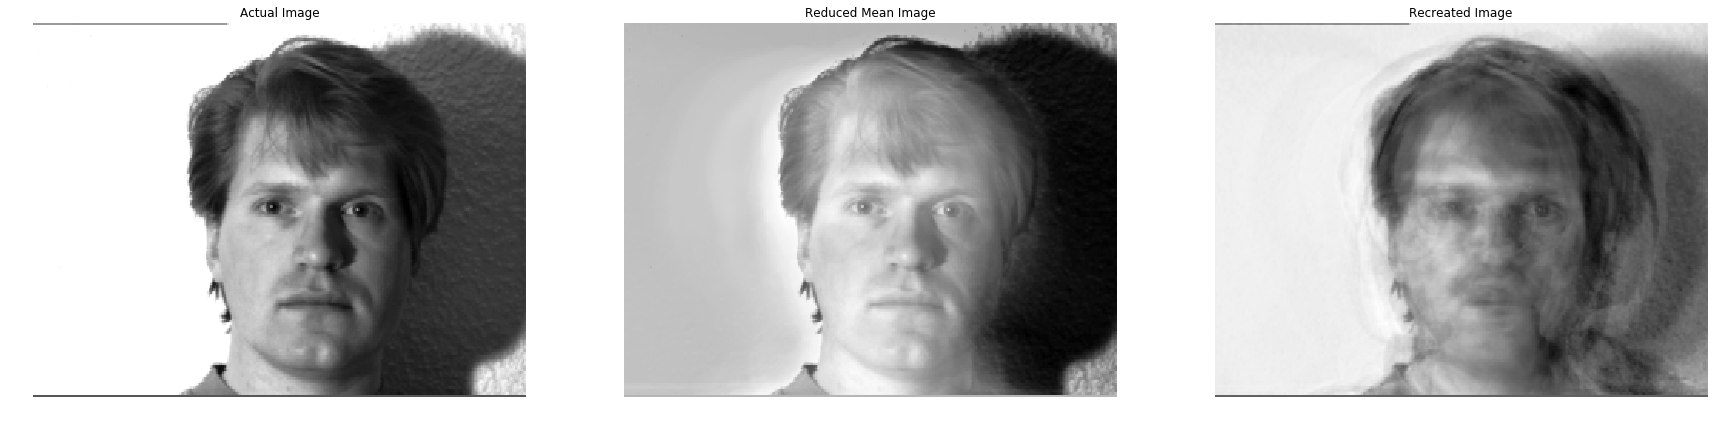

In [12]:
Xnew, error =  findSvd(X,mean_vector,40)
print(error/165)
pltimages(X,Xnew)

X: (165, 77760)   50
u :  (165, 50)
s :  (50,)
vt :  (50, 77760)
z :  (165, 50)
(165, 77760)
2804453256.6776958


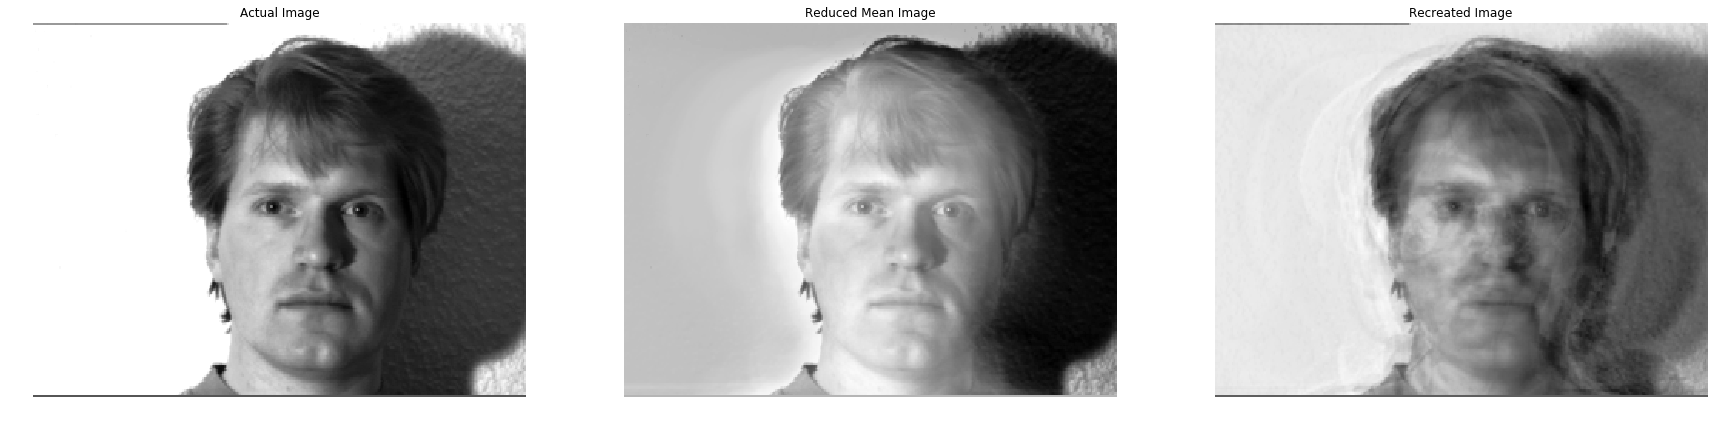

In [13]:
Xnew, error =  findSvd(X,mean_vector,50)
print(error/165)
pltimages(X,Xnew)

X: (165, 77760)   164
u :  (165, 164)
s :  (164,)
vt :  (164, 77760)
z :  (165, 164)
(165, 77760)
2804771043.9561386


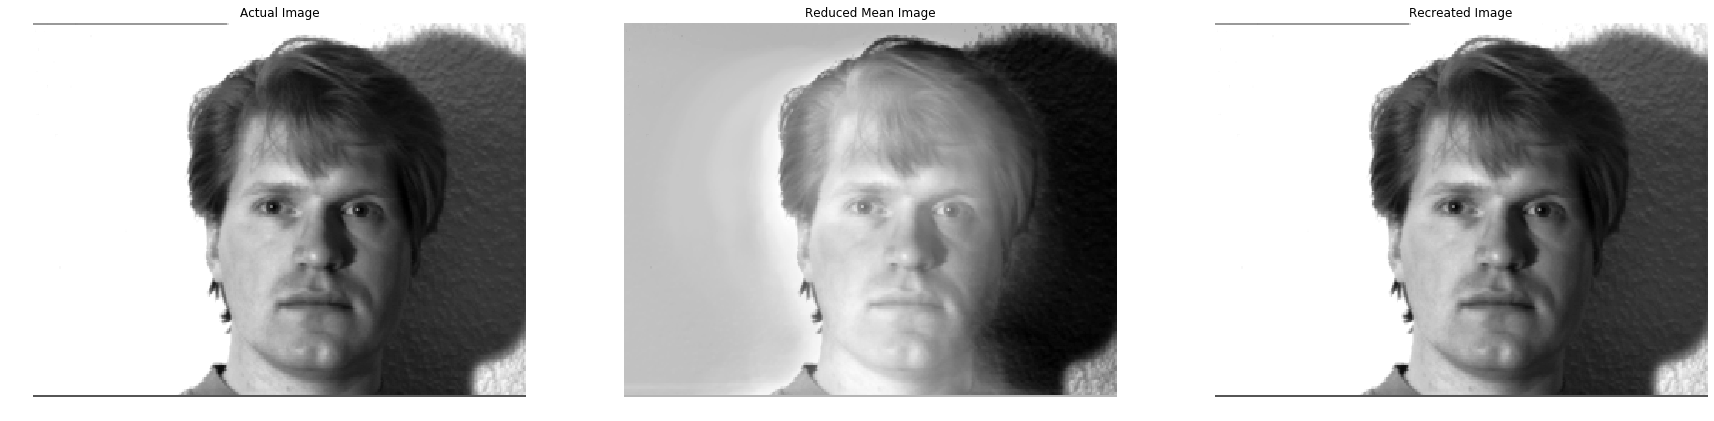

In [14]:
Xnew, error =  findSvd(X,mean_vector,164)
print(error/164)
pltimages(X,Xnew)